# Medical MNIST


## References 
* Colab: 
<a href="https://colab.research.google.com/github/marta-0/medical_mnist/blob/main/notebooks/Medical-MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a> 
* Github repo: https://github.com/marta-0/medical_mnist/blob/main/notebooks/Medical-MNIST.ipynb

In [1]:
import os
import pathlib
import random
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.manifold import TSNE

import plotly.graph_objects as go
random.seed(1)
np.random.seed(1)


## Download the files

In [2]:
!git clone https://github.com/apolanco3225/Medical-MNIST-Classification

fatal: destination path 'Medical-MNIST-Classification' already exists and is not an empty directory.


## Check the classes and prepare the lists of files and labels

In [3]:
PATH = 'Medical-MNIST-Classification/resized'
p = pathlib.Path(PATH)

labels = [x.parts[-1] for x in p.iterdir()]
num_classes = len(labels)

labels.sort()
labels

['AbdomenCT', 'BreastMRI', 'CXR', 'ChestCT', 'Hand', 'HeadCT']

In [4]:
files_paths = []
files_labels = []

for root, dirs, files in os.walk(PATH):
  p = pathlib.Path(root)

  for file in files:
    files_paths.append(root + '/' + file)
    files_labels.append(p.parts[-1])
    
#Example of paths and label
print(files_paths[0])
print(files_labels[0])    

Medical-MNIST-Classification/resized/Hand/005962.jpeg
Hand


In [5]:
len(files_labels), len(files_paths)

(58954, 58954)

In [6]:
labels_cnt = []

for label in labels:
  print(label, files_labels.count(label))
  labels_cnt.append(files_labels.count(label))

AbdomenCT 10000
BreastMRI 8954
CXR 10000
ChestCT 10000
Hand 10000
HeadCT 10000


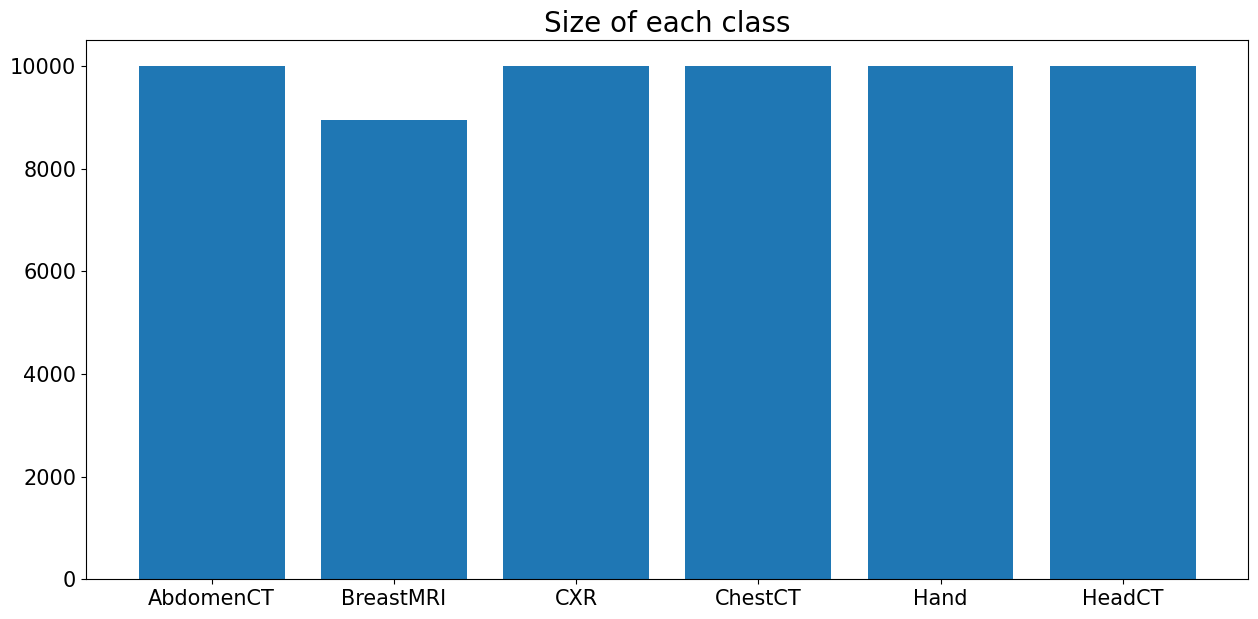

In [7]:
plt.figure(figsize=(15,7))
plt.bar(labels, labels_cnt)
plt.title('Size of each class', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15);

BreastMRI has less instances than the other classes.

## Prepare X and y

Images have been preprocessed already while collecting from databases. Each image is 64 x 64 px.

In [8]:
def prepare_X_y(files_paths, width=64, height=64):
  X = []

  for path in files_paths:
    img = Image.open(path)
    img.load()

    if (width or height) != 64:
      img = img.resize((width,height))

    img_X = np.asarray(img, dtype=np.int16)
    X.append(img_X)

  X = np.asarray(X)
  y = np.asarray(files_labels)

  return X, y

In [9]:
X, y = prepare_X_y(files_paths)

In [10]:
X.dtype

dtype('int16')

In [11]:
y.dtype

dtype('<U9')

In [12]:
X.shape, y.shape

((58954, 64, 64), (58954,))

In [13]:
size = X.shape[-1]
size

64

## Visualisations

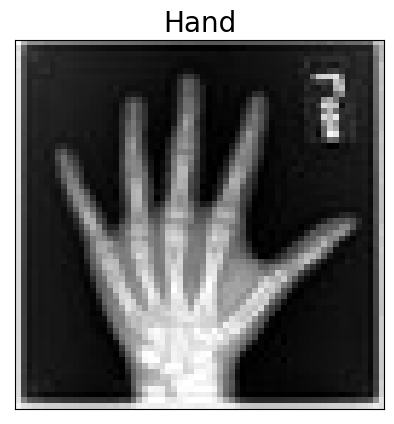

In [14]:
sample_number = 21
plt.imshow(X[sample_number], cmap='gray')
plt.title(y[sample_number], fontsize=20)
plt.xticks([])
plt.yticks([]);

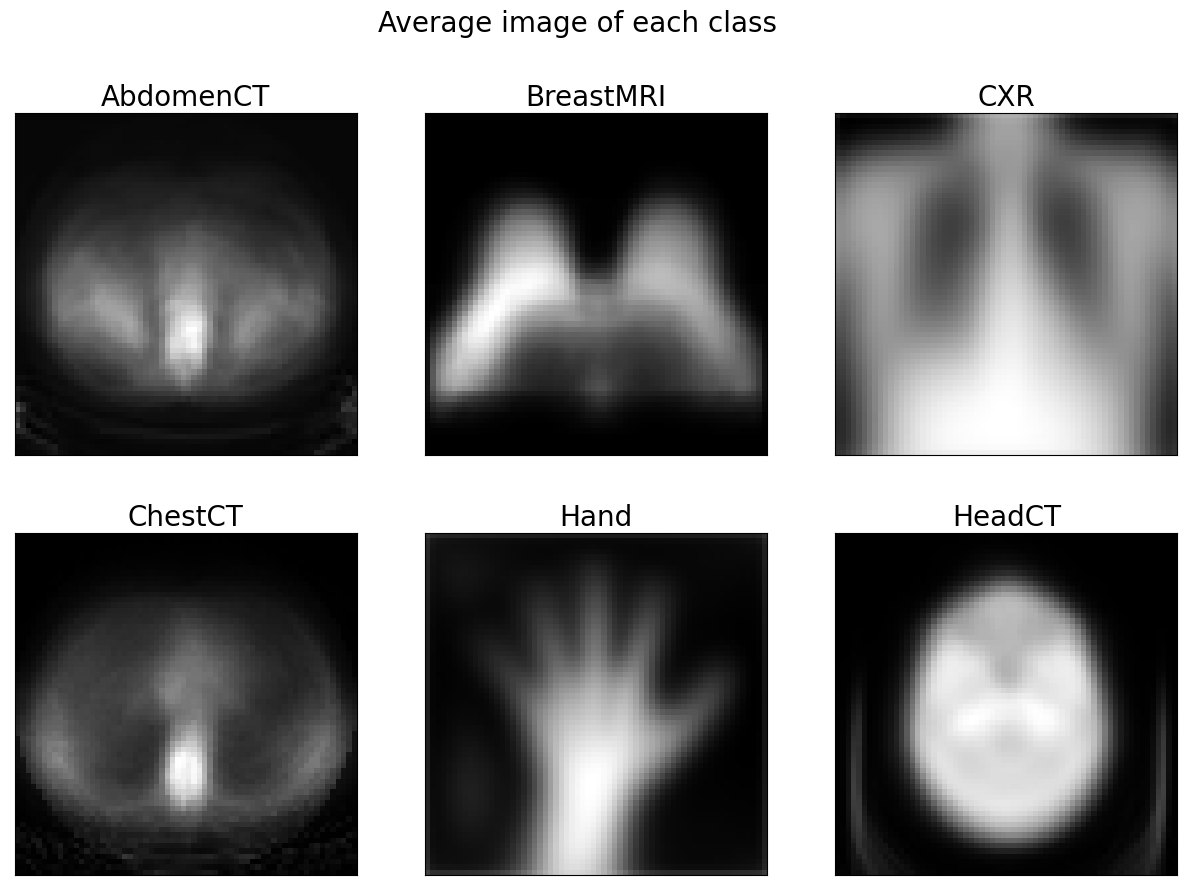

In [15]:
plt.figure(figsize=(15,10))
plt.suptitle('Average image of each class', fontsize=20)

i = 0
for label in labels:
  X_sum = np.sum(X[y ==label], axis=0)
  X_avg = X_sum / files_labels.count(label)
  
  plt.subplot(2,3,i+1)
  plt.imshow(X_avg, cmap='gray')
  plt.title(label, fontsize=20)
  plt.xticks([])
  plt.yticks([])
  i = i + 1

Several examples of each class:

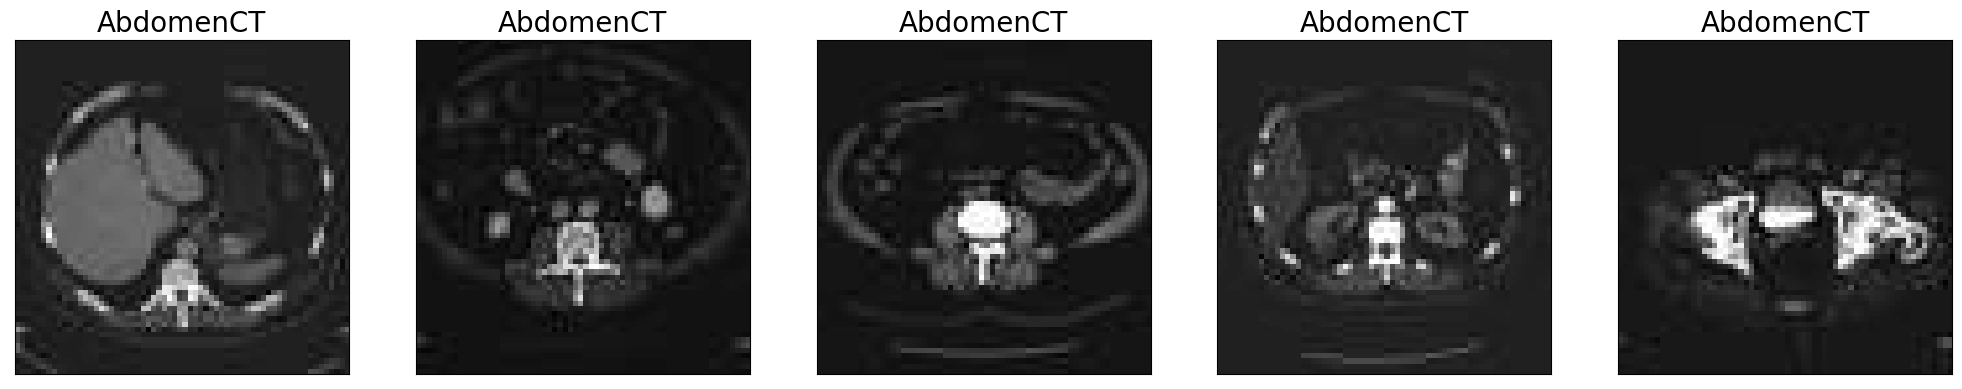

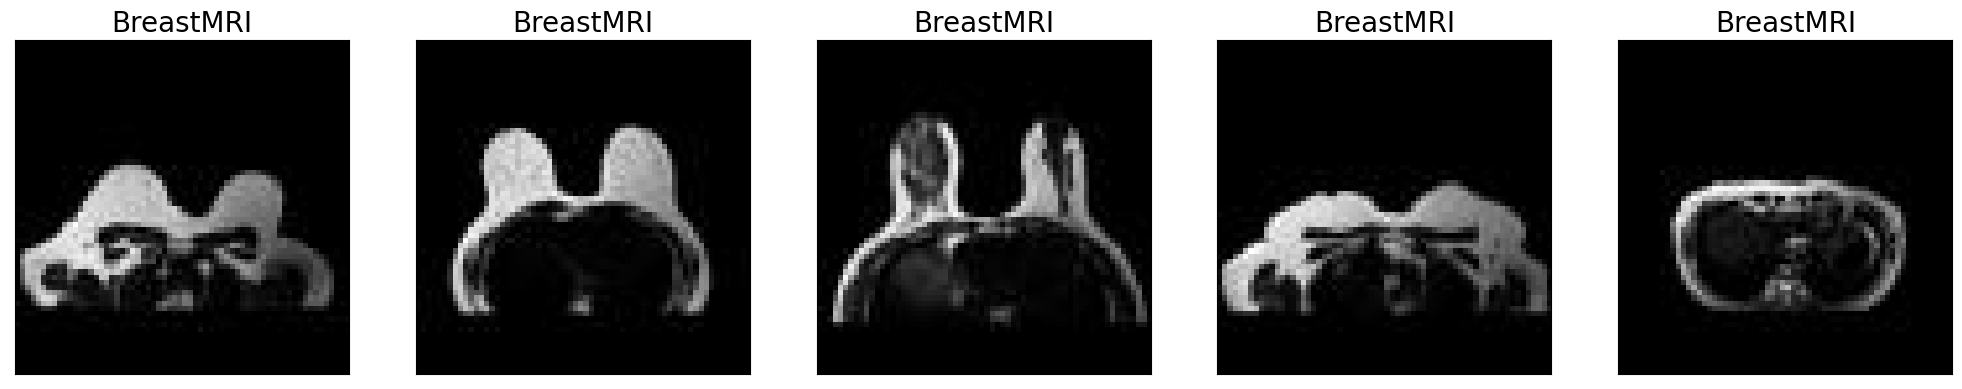

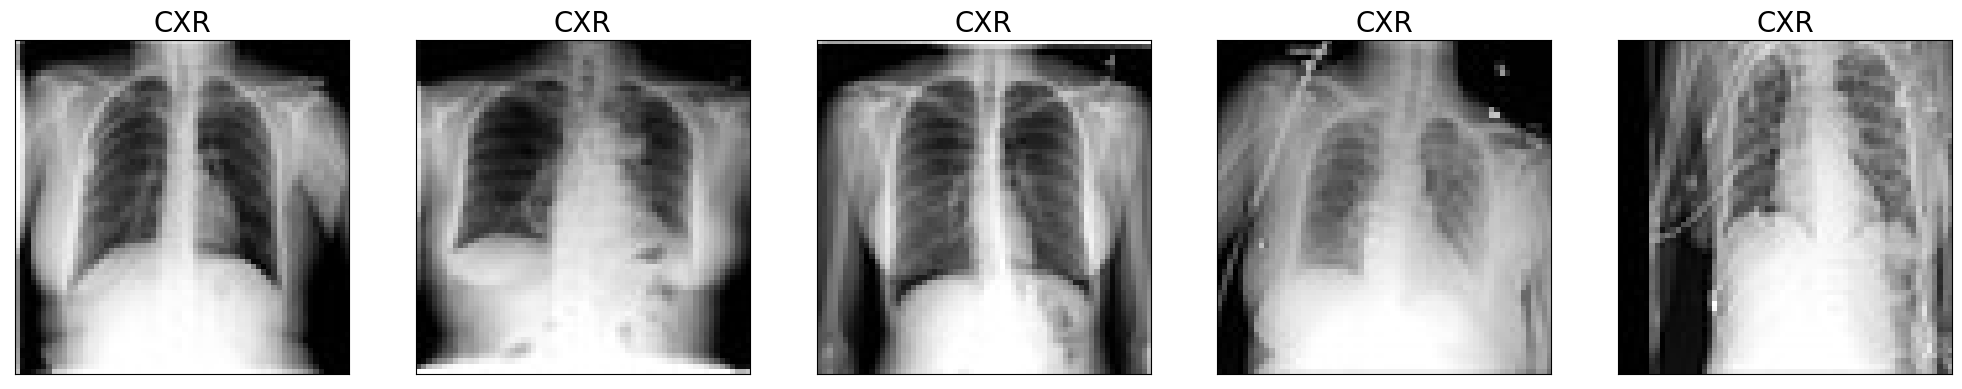

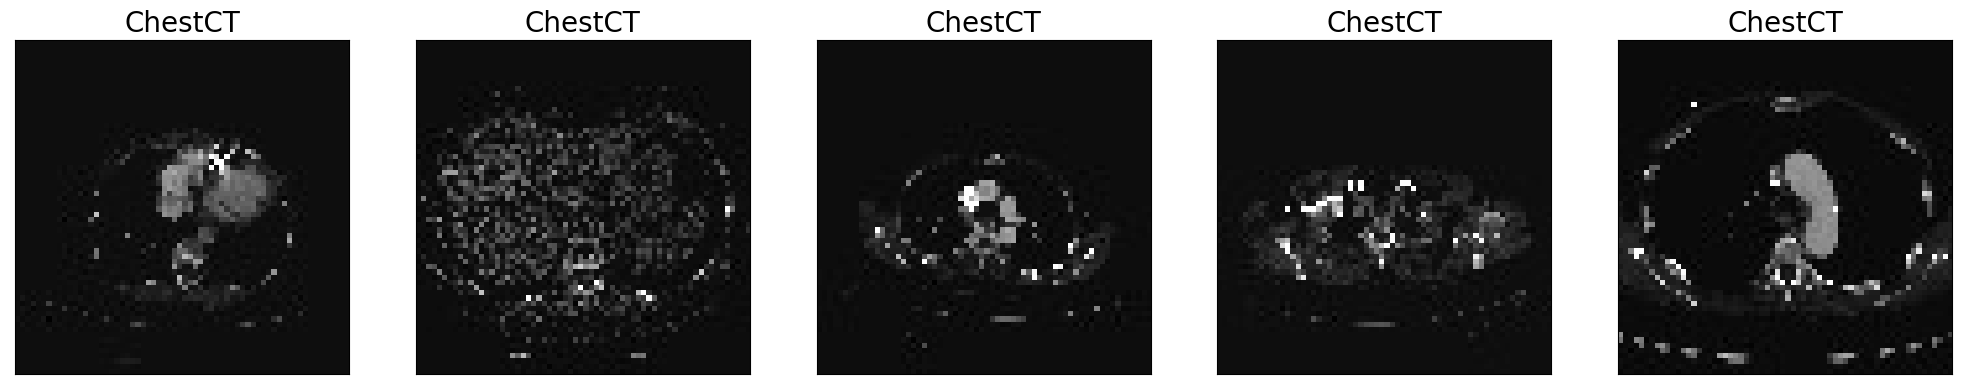

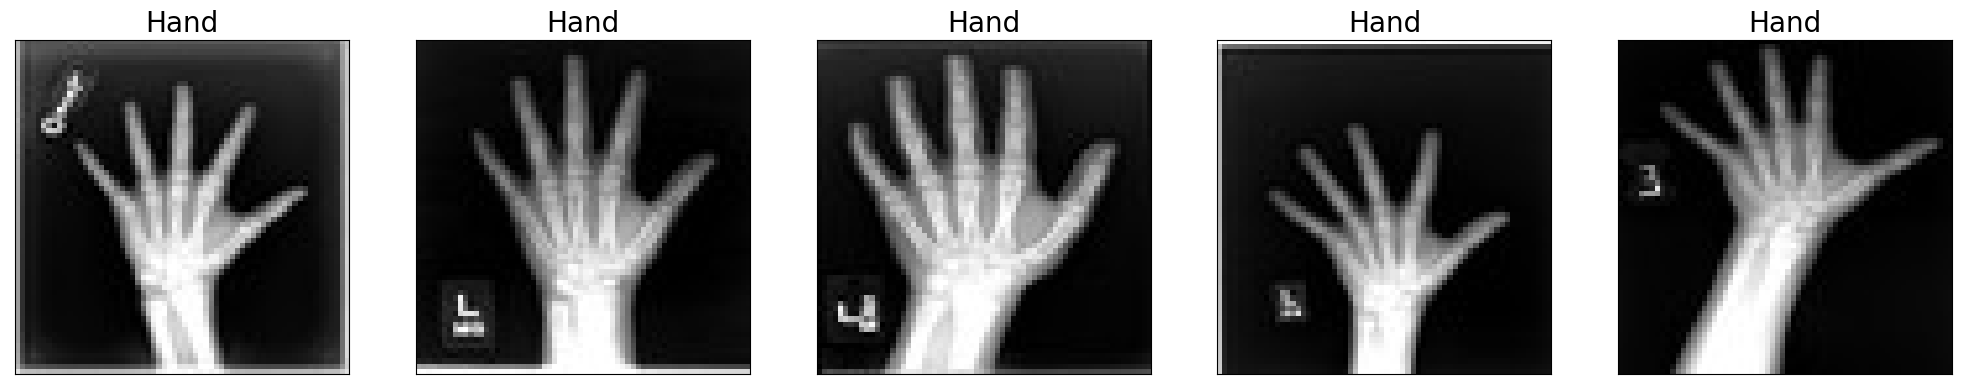

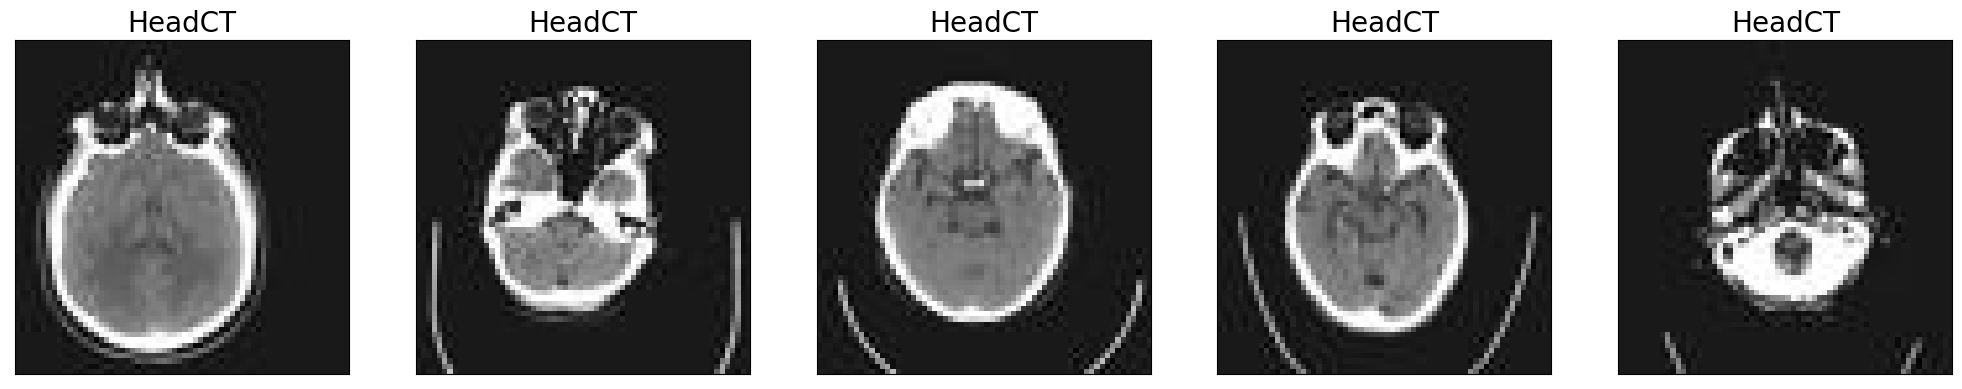

In [16]:
for label in labels:
    images = X[y == label] 
    
    plt.figure(figsize=(25,35))
    for i in range(5):
        plt.subplot(6, 5, i+1)
        plt.imshow(images[i], cmap='gray')
        plt.title(label, fontsize=20)
        plt.xticks([])
        plt.yticks([])

Examples of unusual images from each class:

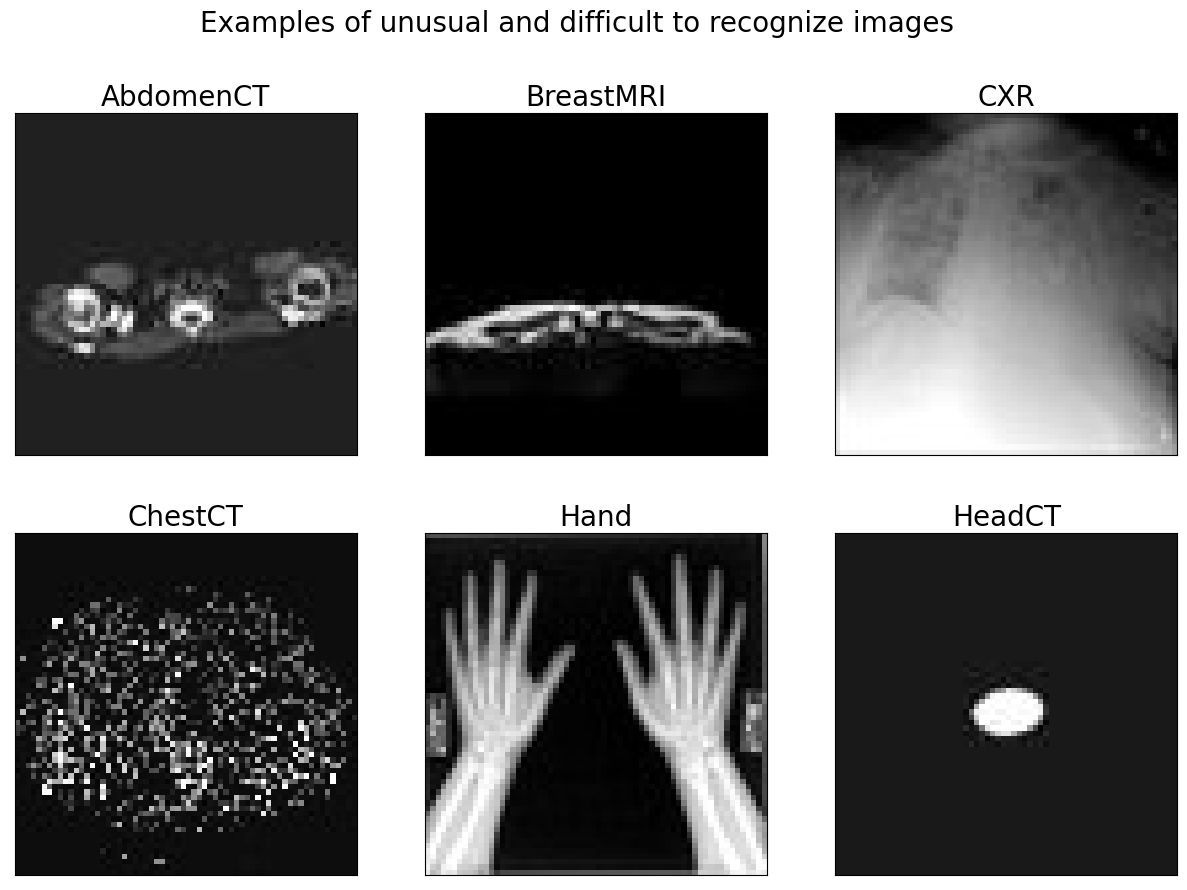

In [17]:
plt.figure(figsize=(15,10))
plt.suptitle('Examples of unusual and difficult to recognize images', fontsize=20)

def plot_unusual(i, path, title):
  plt.subplot(2,3,i)
  img = Image.open(path)
  plt.imshow(img, cmap='gray')
  plt.title(title, fontsize=20)
  plt.xticks([])
  plt.yticks([])

plot_unusual(1, 'Medical-MNIST-Classification/resized/AbdomenCT/005658.jpeg', 'AbdomenCT')
plot_unusual(2, 'Medical-MNIST-Classification/resized/BreastMRI/001248.jpeg', 'BreastMRI')
plot_unusual(3, 'Medical-MNIST-Classification/resized/CXR/009068.jpeg', 'CXR')
plot_unusual(4, 'Medical-MNIST-Classification/resized/ChestCT/006695.jpeg', 'ChestCT')
plot_unusual(5, 'Medical-MNIST-Classification/resized/Hand/006398.jpeg', 'Hand')
plot_unusual(6, 'Medical-MNIST-Classification/resized/HeadCT/000028.jpeg', 'HeadCT')

## Train test split

With *stratify*:

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

In [19]:
labels_cnt_train = []
labels_cnt_test = []

for label in labels:
  labels_cnt_train.append(np.count_nonzero(y_train == label))
  labels_cnt_test.append(np.count_nonzero(y_test == label))

In [20]:
labels_cnt_train, labels_cnt_test

([7000, 6267, 7000, 7000, 7000, 7000], [3000, 2687, 3000, 3000, 3000, 3000])

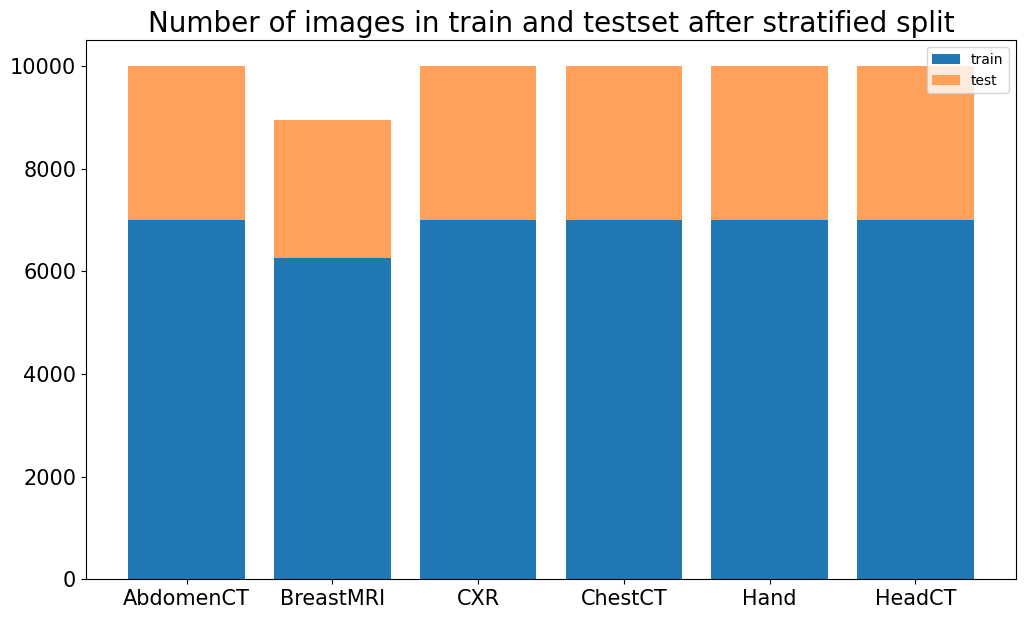

In [21]:
plt.figure(figsize=(12,7))
plt.bar(labels, labels_cnt_train, label='train', color='#1F77B4')
plt.bar(labels, labels_cnt_test, bottom=labels_cnt_train, label='test', color='#FFA15A')
plt.title('Number of images in train and testset after stratified split', fontsize=20)
plt.legend()
plt.xticks(fontsize=15)
plt.yticks(fontsize=15);

Without *stratify*:

In [22]:
X_train_v2, X_test_v2, y_train_v2, y_test_v2 = train_test_split(X, y, test_size=0.3, random_state=1)

In [23]:
labels_cnt_train_v2 = []
labels_cnt_test_v2 = []

for label in labels:
  labels_cnt_train_v2.append(np.count_nonzero(y_train_v2 == label))
  labels_cnt_test_v2.append(np.count_nonzero(y_test_v2 == label))

In [24]:
labels_cnt_train_v2, labels_cnt_test_v2

([7085, 6325, 7024, 6988, 6853, 6992], [2915, 2629, 2976, 3012, 3147, 3008])

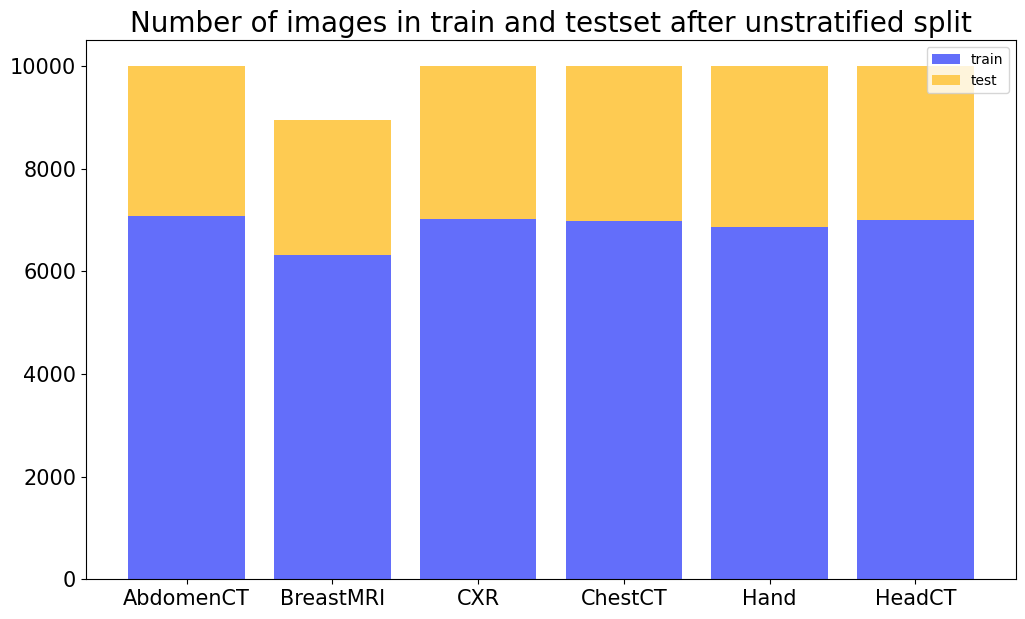

In [25]:
plt.figure(figsize=(12,7))
plt.bar(labels, labels_cnt_train_v2, label='train', color='#636EFA')
plt.bar(labels, labels_cnt_test_v2, bottom=labels_cnt_train_v2, label='test', color='#FECB52')
plt.title('Number of images in train and testset after unstratified split', fontsize=20)
plt.legend()
plt.xticks(fontsize=15)
plt.yticks(fontsize=15);

Compare both split types:

In [32]:
fig = go.Figure(
    data = [
      go.Bar(name="X_train", 
             x=labels, y=labels_cnt_train, 
             offsetgroup=0, marker_color='#1F77B4'),
      go.Bar(name="X_test", x=labels, y=labels_cnt_test, 
             offsetgroup=0, base=labels_cnt_train, marker_color='#FFA15A'),
      go.Bar(name="X_train without stratify", x=labels, y=labels_cnt_train_v2, 
             offsetgroup=1, marker_color='#636EFA'),
      go.Bar(name="X_test without stratify", x=labels, y=labels_cnt_test_v2, 
             offsetgroup=1, base=labels_cnt_train_v2, marker_color='#FECB52')
        ],

    layout=go.Layout(
      title='Comparison of train and testset sizes after stratified and unstritified split',
      yaxis_title='Set size', height=700, font=dict(size=15))
)

fig.add_shape(type='line', x0=-1, y0=7000, x1=6, y1=7000, line=dict(width=1, dash='dot'))

fig.show()

## For: data augmentation;Prepare sets for model; Model; Results and Reproducibility of results visit  https://github.com/marta-0/medical_mnist/blob/main/notebooks/Medical-MNIST.ipynb 